**1. Linear SVM**

In [ ]:
# support vector machines sind ideal für kleine oder mittlere Datensätze.
# Die support vector machine erzeugt eine Entscheidungsebene, die durch die support vectors gestützt wird.
# Ein hoher Wert für C führt zu einem hard margin, ein kleiner Wert zu einem soft margin.

In [ ]:
import pandas as pd

# Beispiel hier: 2 einfach numerische Features und ein Target
df = pd.read_csv('sample_data_svm.csv')
df.head()

In [3]:
# SVM als Klassifizierer
"""
SVC(C=float,    # regularization parameter, controls the 'strictness' of the SVM
    kernel=str  # kernel parameter, controls the learning style of the SVM
    )
"""

"\nSVC(C=float,    # regularization parameter, controls the 'strictness' of the SVM\n    kernel=str  # kernel parameter, controls the learning style of the SVM\n    )\n"

In [ ]:
from sklearn.svm import SVC

model_svm = SVC(C=10,
                kernel='linear'
               )

In [ ]:
# Darstellung der Features
import seaborn as sns
import matplotlib.pyplot as plt

# Erstellung der Figure und Axes
plt.figure(figsize=(14, 6))

# Streudiagramm mit Seaborn
# 'hue' färbt die Punkte basierend auf der 'class'-Spalte ein
sns.scatterplot(
    data=df,
    x='feature_1',
    y='feature_2',
    hue='class',  # Färbt die Punkte nach der Klasse ein
    style='class', # Optionale Anpassung der Markerform nach Klasse
    s=100         # Größe der Punkte
)

# Titel und Achsenbeschriftungen
plt.title('Streudiagramm von feature_1 vs. feature_2, eingefärbt nach Klasse')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Legende anzeigen
plt.legend(title='Klasse')

# Gitter hinzufügen
plt.grid(True)

# Plot anzeigen
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(df.loc[:, ['feature_1', 'feature_2']])
model_svm.fit(X=features, y=df.loc[:, 'class'])

**2. Non-Linear SVM**

**Polynomiell**

In [ ]:
# Nutze polynomiale Kernels mit kernel='poly', degree und gamma.
# Nutze den gaußschen Kernel mit kernel='rbf' und gamma.
# SVMs bilden immer Trennungs-Hyperebenen. Die Kernels entscheiden darin, in welchen Dimensionen und mit welchen Features sie arbeiten.

In [ ]:
import pandas as pd
df_nonlinear = pd.read_csv('nonlinear_data.csv')
df_nonlinear.head()

In [ ]:
import seaborn as sns
sns.scatterplot(data=df_nonlinear, x='feature_1', y='feature_2', hue='class', palette=['#3399db', '#854d9e'], s=60);

In [ ]:
# import SVC and cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# split df into features and target
features = df_nonlinear.loc[:, ['feature_1', 'feature_2']]
target = df_nonlinear.loc[:, 'class']

# training and validation
model_lin = SVC(kernel='linear')  # instantiate and train linear svm
scores = cross_val_score(estimator=model_lin, X=features, y=target, cv=5, scoring='f1', n_jobs=-1)  # 5-fold cross-validation using f1-score and all available cpus

print('Mean f1-score:', scores.mean())

In [ ]:
model_poly = SVC(kernel='poly', degree=2, gamma='scale')  # instantiate and train polynomial svm

In [ ]:
scores_poly = cross_val_score(estimator=model_poly, X=features, y=target, cv=5, scoring='f1', n_jobs=-1)  # 5-fold cross-validation using f1-score and all available cpus
print('Mean f1-score:', scores_poly.mean())

**Der Gauß'sche-Kernel**

In [ ]:
model_rbf = SVC(kernel='rbf', gamma='scale')  # instantiate and train SVM with radial basis function
scores_rbf = cross_val_score(estimator=model_rbf, X=features, y=target, cv=5, scoring='f1', n_jobs=-1)  # 5-fold cross-validation using f1-score and all available CPUs
print('Mean f1-score:', scores_rbf.mean())

**3. NLP**

In [ ]:
import pandas as pd
df = pd.read_csv('text_messages.csv', index_col=0)
df.head()

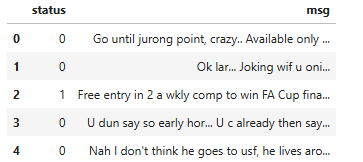

**3.1 Tokenisierung, dann Textbereinigung (Lemmatisierung, Stoppwort- und Satzzeichen-Entfernung)**

In [ ]:
import spacy
import nltk
import string
import re

# Import stopwords from nltk
from nltk.corpus import stopwords

# Save stopwords as a set
stopWords = set(stopwords.words('english'))

# List of punctuation marks
punctuations = string.punctuation

# Loading the English module
nlp = spacy.load('en_core_web_sm')

# `text_cleaner` function
def text_cleaner(sentence):
    """Clean the text using typical NLP-Steps.
 
    Steps include: Lemmatization, removing stop words, removing punctuations 
 
    Args:
        sentence (str): The uncleaned text.
 
    Returns:
        str: The cleaned text.
        
    """

    # Create the Doc object named `text` from `sentence` using `nlp()`
    doc = nlp(sentence)
    # Lemmatization
    lemma_token = [token.lemma_ for token in doc if token.pos_ != 'PRON']
    # Remove stop words and converting tokens to lowercase
    no_stopWords_lemma_token = [token.lower() for token in lemma_token if token not in stopWords]
    # Remove punctuations
    clean_doc = [token for token in no_stopWords_lemma_token if token not in punctuations]
    # Use the `.join` method on `text` to convert string
    joined_clean_doc = " ".join(clean_doc)
    # Use `re.sub()` to substitute multiple spaces or dots`[\.\s]+` to single space `' '
    final_doc = re.sub('[\.\s]+', ' ', joined_clean_doc)
    return final_doc

In [ ]:
df.loc[:, 'msg_clean'] = df.loc[:, 'msg'].apply(text_cleaner)
df.head()

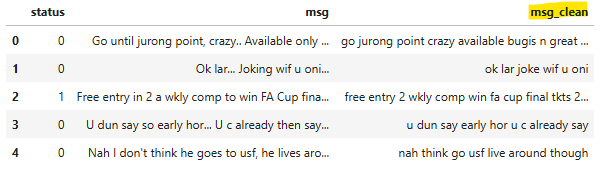

In [ ]:
from sklearn.model_selection import train_test_split

features = df.loc[:, 'msg_clean']  # features are based on cleaned dataset
target = df.loc[:, 'status']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.3, # use 30% of data as test set
                                                                            random_state=1)

**3.2 Vektorisierung**

In [ ]:
# Die BoW-Methode (CountVectorizer) vektorisiert Wörter anhand ihrer Häufigkeiten im Text.
# Die TF-IDF-Vektorisierung (TfidfVectorizer) berücksichtigt die Relevanz eines Wortes.

**BoW (Bag of Words)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
features_train_bow = count_vectorizer.fit_transform(features_train)

In [ ]:
"""type(features_train_bow)
bow_features = count_vectorizer.get_feature_names() 
len(bow_features)
bow_array = features_train_bow.toarray()
bow_vector = pd.DataFrame(bow_array, columns=bow_features)
bow_vector.head()"""

**TF-IDF-Vektorisierung**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
features_train_tfidf = tfidf_vectorizer.fit_transform(features_train)

In [ ]:
"""tfidf_features = tfidf_vectorizer.get_feature_names() 
len(tfidf_features)
tfidf_vector = pd.DataFrame(features_train_tfidf.toarray(), columns = tfidf_features)
tfidf_vector.head()"""

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(dual=False, random_state=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

search_space = {'C': [0.01, 0.1, 1, 10, 100], 
                'class_weight': [None, 'balanced']}

model_grid = GridSearchCV(estimator=model, 
                          param_grid=search_space, 
                          cv=5, 
                          n_jobs=-1, 
                          scoring="f1")

**3.3 SVC auf die BoW-Features anwenden**

In [ ]:
model_grid.fit(features_train_bow, target_train)
print('Best score:', model_grid.best_score_) 
print('Best C:', model_grid.best_estimator_.C)
print('Best class weights:', model_grid.best_estimator_.class_weight) 

In [ ]:
features_test_bow = count_vectorizer.transform(features_test)
target_test_pred_bow = model_grid.predict(features_test_bow)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_bow = confusion_matrix(target_test, target_test_pred_bow)

In [ ]:
import seaborn as sns

sns.heatmap(confusion_matrix_bow, annot=True, fmt='d')  # annot=True shows the numbers, fmt='d' supresses scientific notation

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_pred_bow, target_names=["Not spam", "Spam"]))  # We need print because classification_report returns a string with linebreaks

**3.4 Vorhersagen mit den TF-IDF Features**

In [ ]:
model_grid.fit(features_train_tfidf, target_train)

print('Best score:', model_grid.best_score_) 
print('Best C:', model_grid.best_estimator_.C) 
print('Best class_weight:', model_grid.best_estimator_.class_weight) 

In [ ]:
features_test_tfidf = tfidf_vectorizer.transform(features_test)
target_test_pred_tfidf = model_grid.predict(features_test_tfidf)

confusion_matrix_tfidf = confusion_matrix(target_test, target_test_pred_tfidf)

In [ ]:
sns.heatmap(confusion_matrix_tfidf, annot=True, fmt='d')  # annot=True shows the numbers, fmt='d' supresses scientific notation

In [ ]:
print(classification_report(target_test, target_test_pred_tfidf, target_names=["Not Spam", "Spam"]))

**3.5 Verbesserung durch Kernelauswahl?**

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model_kernel = SVC(random_state=1, max_iter=10000)

search_space_kernel = {'C': [0.01, 0.1, 1, 10, 100], 
                       'kernel': ['poly', 'rbf'], 
                       'class_weight': [None, 'balanced']}

model_grid_kernel = GridSearchCV(estimator=model_kernel, 
                                 param_grid=search_space_kernel, 
                                 cv=5, 
                                 n_jobs=-1, 
                                 scoring="f1")

model_grid_kernel.fit(features_train_bow,target_train)

print('Best score:', model_grid_kernel.best_score_) 
print('Best C:', model_grid_kernel.best_estimator_.C) 
print('Best kernel:', model_grid_kernel.best_estimator_.kernel)
print('Best class_weight:', model_grid_kernel.best_estimator_.class_weight) 